\usepackage{amsmath}
\usepackage{amsfonts}
\usepackage{amssymb}
\usepackage{xcolor}

\definecolor{ashBlack}{HTML}{111111}
\definecolor{matrixGreen}{HTML}{03A062}
\definecolor{matrixBlue}{HTML}{03A0C2}
\definecolor{maizeCrayola}{HTML}{E8C547}
\definecolor{blueGray}{HTML}{6290C3}
\definecolor{ruby}{HTML}{D81E5B}

# From Jupyter to Substack

This notebook demonstrates the `nb2wb` converter. It covers the three pillars
of technical writing: prose, mathematics, and code.

Here's a nice image for illustration.

![The parallelogram rule](image.png)

## 1  Inline LaTeX → Unicode

Inline expressions like $\alpha + \beta = \gamma$ or $E = mc^2$ are converted
to Unicode so they render as plain readable text in Substack's editor.

Other examples: the golden ratio $\phi = \frac{1+\sqrt{5}}{2}$, and Euler's
identity $e^{i\pi} + 1 = 0$.

## 2  Display Math → Image

Block equations are rendered to crisp PNG images.

The quadratic formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Bayes' theorem:

$$P({\color{maizeCrayola} A} \mid {\color{blueGray} B}) = \frac{P({\color{blueGray} B} \mid {\color{maizeCrayola} A})\, P({\color{maizeCrayola} A})}{P({\color{blueGray} B})}.$$

A matrix equation:

\[
  \mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}.
\]

The Basel formula:

$$
\sum_{n=1}^{\infty} \frac{1}{n^2} = \frac{\pi^2}{6}.
$$

## 3  Code Blocks → Image

Code cells and their outputs are rendered as syntax-highlighted images,
so formatting and colours are perfectly preserved.

In [1]:
def fibonacci(n):
    """Yield the first n Fibonacci numbers."""
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

print("Fibonacci sequence (first 10 terms):")
print(*fibonacci(10))

Fibonacci sequence (first 10 terms):
0 1 1 2 3 5 8 13 21 34


In [2]:
import numpy as np

x = np.arange(10)
x ** 2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

## 4  Mixed: equation in context

The softmax function maps a vector $\mathbf{z} \in \mathbb{R}^K$ to a
probability distribution:

$$\sigma(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}$$

Here $j = 1, \ldots, K$ indexes the classes.  Note that $\sum_j \sigma_j = 1$
by construction.

In [3]:
import numpy as np

def softmax(z):
    e = np.exp(z - z.max())   # numerical stability
    return e / e.sum()

z = np.array([1.0, 2.0, 3.0])
probs = softmax(z)
print(f"softmax({z.tolist()}) = {np.array2string(probs, precision=4)}")

softmax([1.0, 2.0, 3.0]) = [0.09   0.2447 0.6652]


## 5  Figures

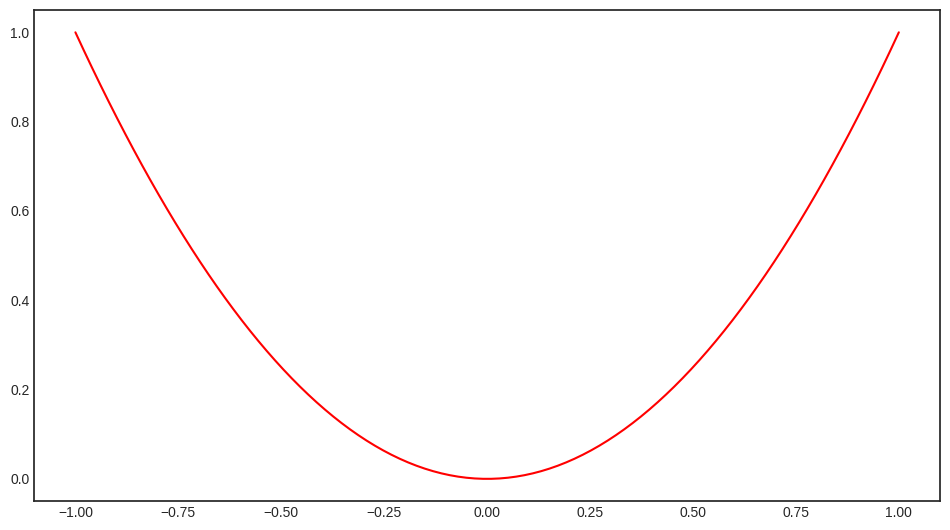

In [8]:
import matplotlib.pyplot as plt


with plt.style.context("seaborn-v0_8-white"):
    x_min = -0.1
    x_max = 20.1
    fig = plt.figure(figsize=(19.2/2, 10.8/2))
    
    X = np.linspace(-1, 1, 100)
    y = X**2
    plt.plot(X, y, color="red")

    plt.tight_layout()
    plt.show()

## 6  Cell Tags

Cells can be tagged to control what appears in the output.
Tags are set via **Edit → Cell Metadata** (or the cell toolbar) in Jupyter.

| Tag | Effect |
|---|---|
| `hide-cell` | Entire cell omitted (input + output) |
| `hide-input` | Source code hidden; output shown |
| `hide-output` | Output hidden; source code shown |

The next cell is tagged `hide-input`: only its output is rendered.

In [ ]:
result = sum(i**2 for i in range(1, 11))
print(f"Sum of squares 1..10 = {result}")

Sum of squares 1..10 = 385


The next cell is tagged `hide-output`: only its source code is rendered.

In [ ]:
import sys
print(f"Python {sys.version}")
print("(This output is hidden in the published post.)")

Python 3.12.3 (main, Sep 11 2024, 14:17:37) [GCC 13.2.0]
(This output is hidden in the published post.)


The setup cell at the top of this notebook is tagged `hide-cell` and is invisible in the output.